In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.shape)

(200, 5)


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [6]:
X = np.asanyarray(df.values[: , 1:])
X[:10]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6],
       [ 0, 23, 16, 77],
       [ 0, 31, 17, 40],
       [ 0, 22, 17, 76],
       [ 0, 35, 18,  6],
       [ 0, 23, 18, 94],
       [ 1, 64, 19,  3],
       [ 0, 30, 19, 72]])

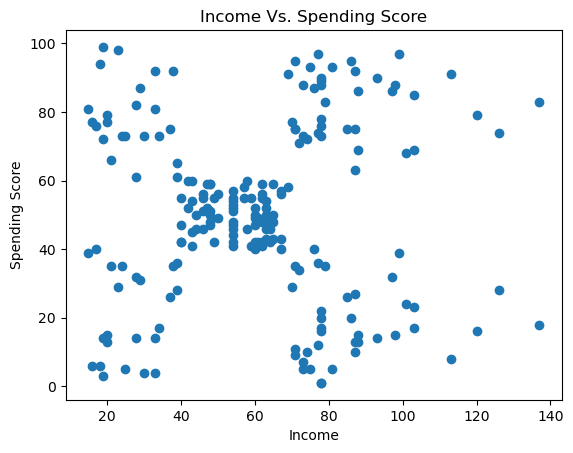

In [7]:
plt.scatter(X[: , 2] , X[:  ,3] )
plt.ylabel('Spending Score')
plt.xlabel('Income')
plt.title('Income Vs. Spending Score')
plt.savefig('income_score.png', bbox_inches = 'tight')

plt.show()

In [8]:
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

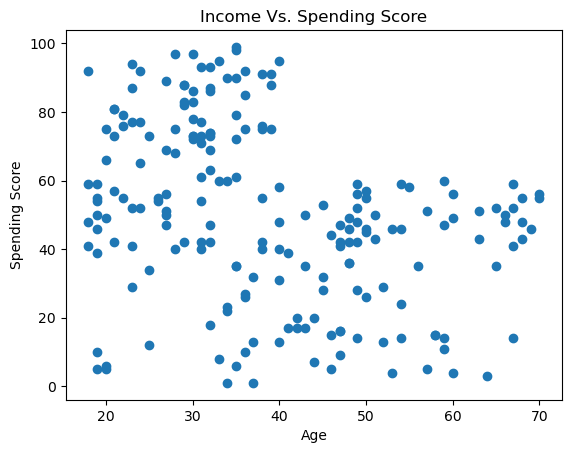

In [9]:
plt.scatter(X[: ,1 ] , X[:  ,3] )
plt.ylabel('Spending Score')
plt.xlabel('Age')
plt.title('Income Vs. Spending Score')
plt.show()

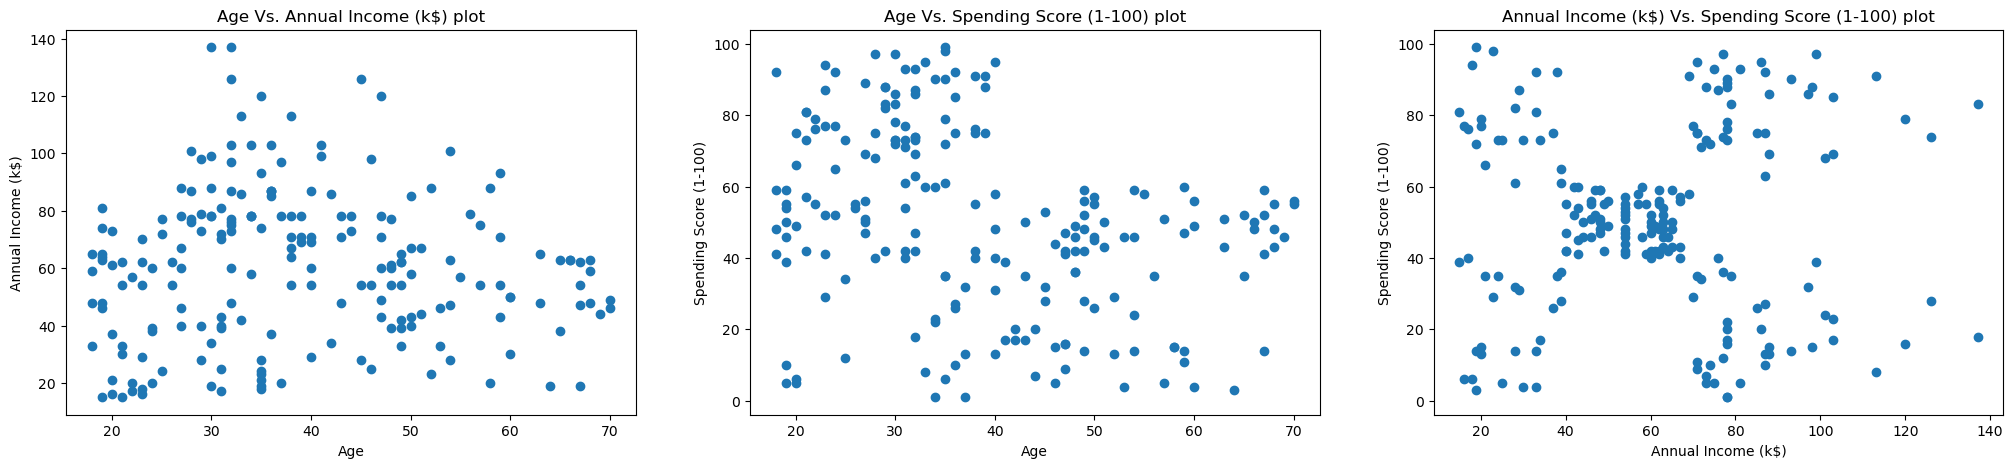

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3 , figsize=(25, 5))
# print(axs.shape)

list = []
axs
count = 0
for i in range(1,4):
    for j in range(1,4):
        
        if i == j:
            continue
        elif i+j in list:
            continue
        list.append(i+j)
        # print(i , j)
        
        count+=1
        # print(count)

        ax = plt.subplot(1, 3, count)
        plt.scatter(X[: , i ] , X[:  ,j] )
        plt.xlabel('%s' % df.columns[i+1])
        plt.ylabel('%s' % df.columns[j+1])
        plt.title('{0} Vs. {1} plot'.format(df.columns[i+1] ,df.columns[j+1] ))
        

#         plt.scatter(X[: , i ] , X[:  ,j] )
plt.savefig('income_age_score.png', bbox_inches = 'tight')


### I guess clustering will be meaningful in second and third plots!

# First Model: K-Means:

In [11]:
from sklearn.cluster import KMeans

k = 5
n = 20
k_means = KMeans(init = 'k-means++' , n_clusters = k  , n_init = n )
k_means.fit(X)

KMeans(n_clusters=5, n_init=20)

In [12]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [13]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333]])

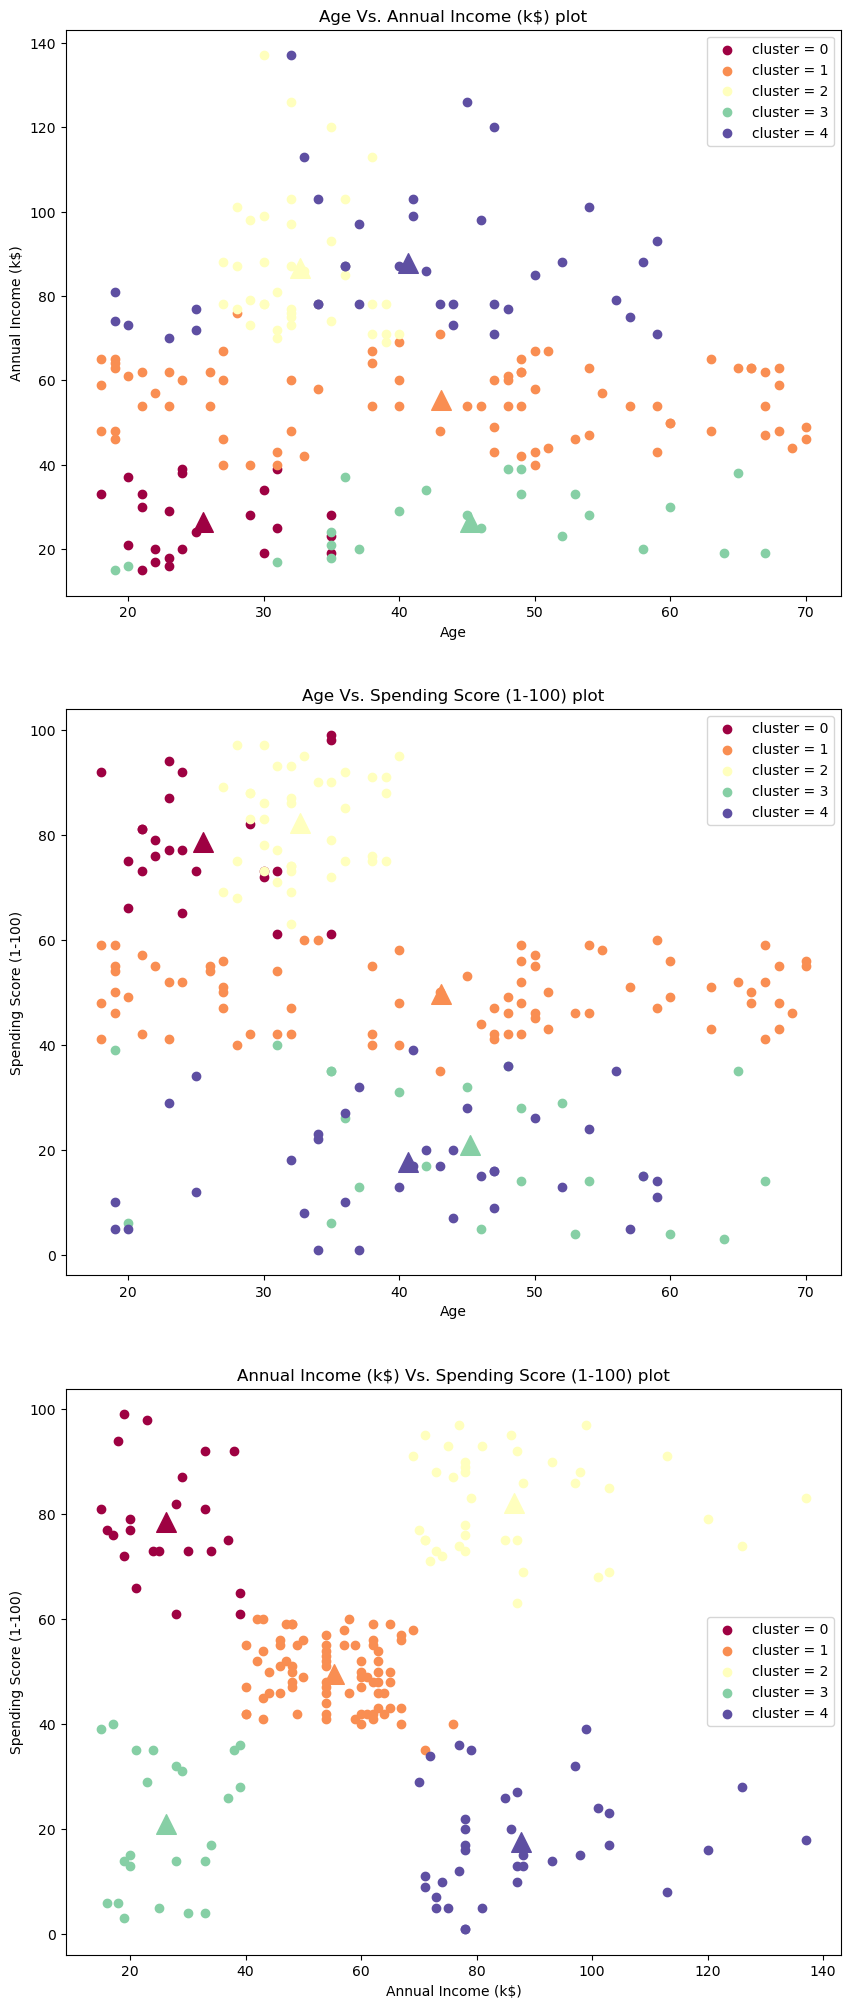

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=1 , figsize=(10, 25))
# print(axs.shape)

list = []
axs
count = 0
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

for i in range(1,4):
    for j in range(1,4):
        
        if i == j:
            continue
        elif i+j in list:
            continue
        list.append(i+j)
        # print(i , j)
        
        count+=1
        # print(count)

        ax = plt.subplot(3, 1, count)
        for k , col in zip(range(5) , colors):

            my_members = (k_means_labels == k)
            
            cluster_center = k_means_cluster_centers[k]
            
            ax.scatter(X[my_members, i], X[my_members, j],label = 'cluster = {0}'.format(k) , color = col , )
            # print(X[my_members , :])
            ax.scatter(cluster_center[i], cluster_center[j],s =200 , marker='^' , color = col )
        # plt.scatter(X[: , i ] , X[:  ,j] )
        plt.xlabel('%s' % df.columns[i+1])
        plt.ylabel('%s' % df.columns[j+1])
        plt.title('{0} Vs. {1} plot'.format(df.columns[i+1] ,df.columns[j+1] ))
        plt.legend()
plt.savefig('income_age_score_cluster.png', bbox_inches = 'tight')

plt.show()


In [15]:
k = 2
n = 20
k_means = KMeans(init = 'k-means++' , n_clusters = k  , n_init = n )
k_means.fit(X)

KMeans(n_clusters=2, n_init=20)

In [16]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [17]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 0.44705882, 28.95294118, 62.17647059, 73.62352941],
       [ 0.43478261, 46.16521739, 59.36521739, 32.88695652]])

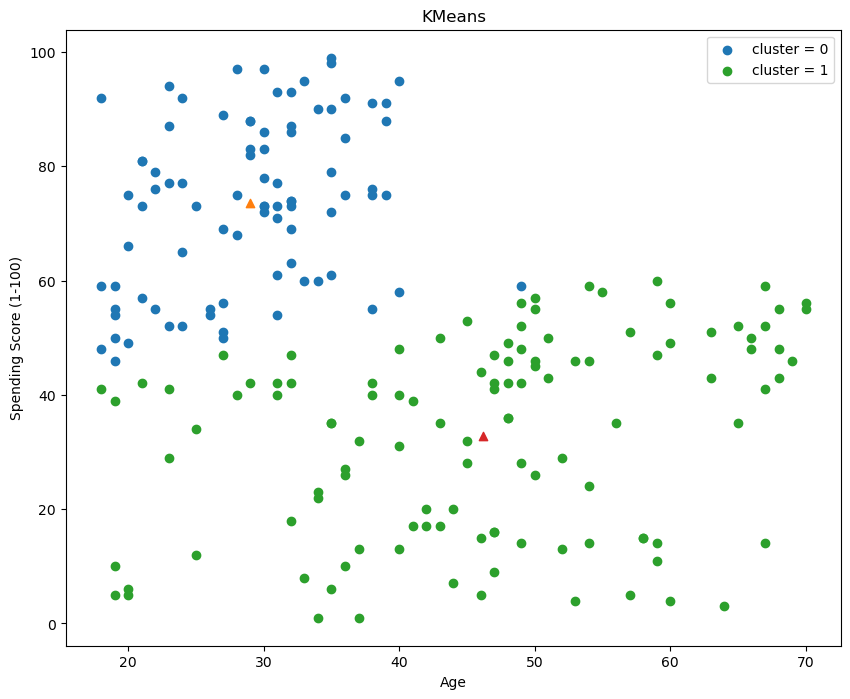

In [18]:
fig = plt.figure(figsize=(10 , 8))


# colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)


for k in range(2):

    my_members = (k_means_labels == k)

    cluster_center = k_means_cluster_centers[k]

    ax.scatter(X[my_members, 1], X[my_members, 3], label = 'cluster = {0}'.format(k))
    
    ax.scatter(cluster_center[1], cluster_center[3] , marker ='^')

ax.set_title('KMeans')

plt.xlabel('%s' % df.columns[1+1])
plt.ylabel('%s' % df.columns[3+1])
ax.legend()
# Show the plot
plt.savefig('age_score_KMeans.png', bbox_inches = 'tight')

plt.show()


In [19]:
k_means2 = KMeans(init= 'k-means++' , n_clusters=5 , n_init=15)
k_means2.fit(X)

KMeans(n_clusters=5, n_init=15)

In [20]:
k_means2_labels = k_means2.labels_
k_means2_center = k_means2.cluster_centers_

In [21]:
print(k_means2_labels)
print(type(k_means2_labels))
set(k_means2_labels)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]
<class 'numpy.ndarray'>


{0, 1, 2, 3, 4}

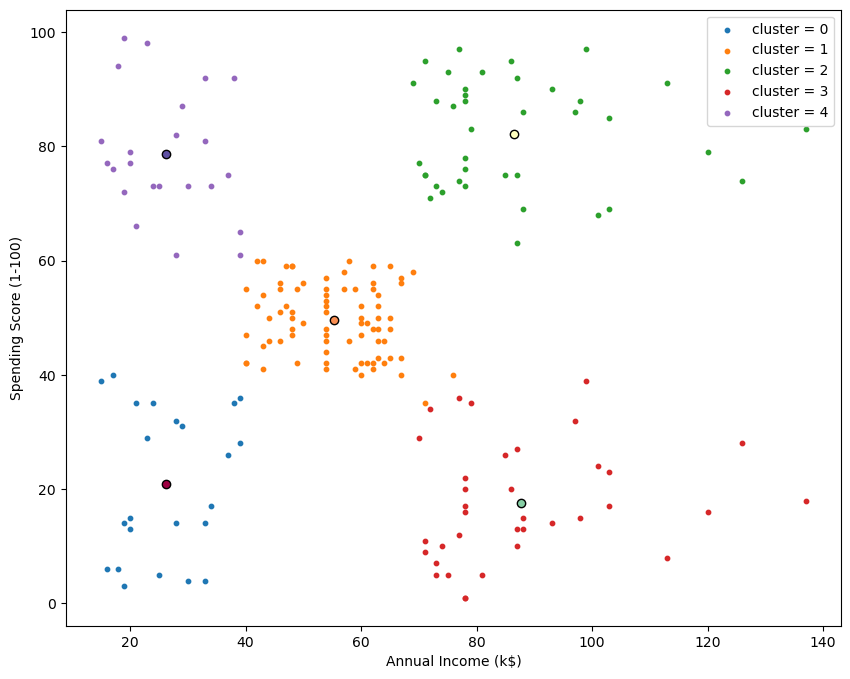

In [22]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1)

colors = plt.cm.Spectral(np.linspace(0 , 1 , len(set(k_means2_labels))))

for k , col in zip(range(5) , colors):
    my_members2 = k_means2_labels == k

    cluster_center2 = k_means2_center[k]

    plt.scatter(X[my_members2 , 2] , X[my_members2 , 3] , label = 'cluster = {0}'.format(k) , s=10 )
    point = plt.plot(cluster_center2[2], cluster_center2[3], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6 )
    # point.set_label('Label via method')


plt.xlabel('%s' % df.columns[2+1])
plt.ylabel('%s' % df.columns[3+1])
plt.legend()
plt.savefig('income_score_KMeans.png', bbox_inches = 'tight')

plt.show()


In [23]:
df.drop('Gender', inplace=True, axis=1)
df


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [24]:
df.drop('CustomerID', inplace=True, axis=1)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [25]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [26]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [27]:
df["Clus_km"] = labels
df.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,19,15,39,3
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3


In [28]:
df.groupby('Clus_km').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


In [29]:
df

,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,19,15,39,3
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3
...,...,...,...,...
195,35,120,79,2
196,45,126,28,4
197,32,126,74,2
198,32,137,18,4


In [30]:
X = df.values[:,[0,1,2]]
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

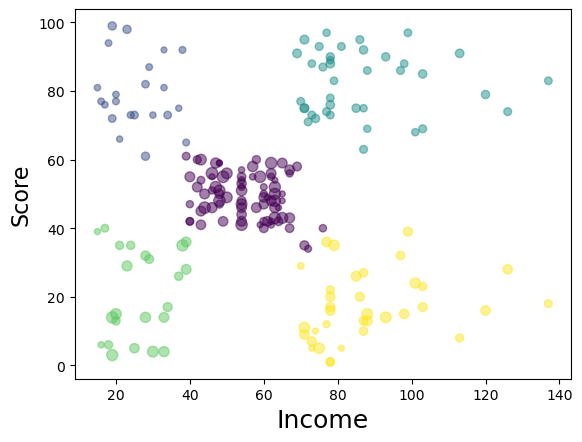

In [31]:
area = X[:, 0] 
plt.scatter(X[:, 1], X[:, 2], s=area, c=labels, alpha=0.5)
plt.xlabel('Income', fontsize=18)
plt.ylabel('Score', fontsize=16)
plt.show()

/tmp/ipykernel_120185/4209884477.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[1, 0, .95, 1], elev=10, azim=30)


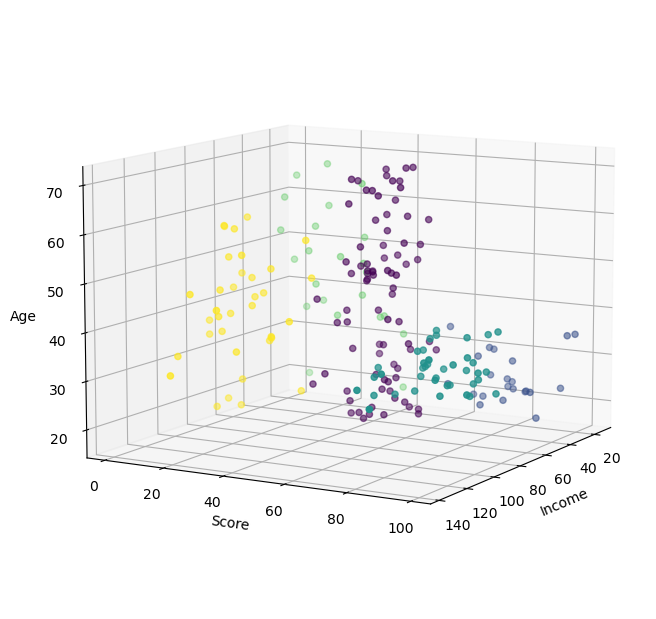

In [32]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[1, 0, .95, 1], elev=10, azim=30)

plt.cla()

ax.set_xlabel('Income')
ax.set_ylabel('Score')
ax.set_zlabel('Age')

ax.scatter(X[:, 1], X[:, 2], X[:, 0], c= labels)
plt.savefig('income_age_score_3D.png', bbox_inches = 'tight')


# Second Model:  Hierarchical Clustering


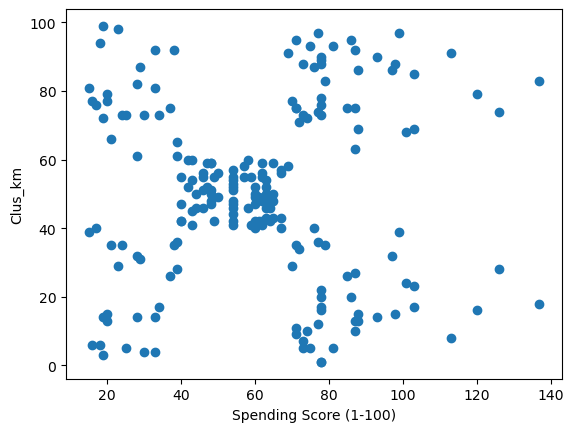

In [33]:
plt.scatter(X[: , 1] , X[: , 2])
plt.xlabel(df.columns[1+1])
plt.ylabel(df.columns[2+1])
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'average')

In [35]:
agglom.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [36]:
X[:5]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40]])

In [37]:
from scipy.spatial import distance_matrix
dist_matrix = distance_matrix(X,X) 
print(dist_matrix)

[[  0.          42.04759208  33.03028913 ... 117.1110584  124.47489707
  130.15759678]
 [ 42.04759208   0.          75.01333215 ... 111.7631424  137.74614332
  122.34786471]
 [ 33.03028913  75.01333215   0.         ... 129.87686476 122.18428704
  143.77065069]
 ...
 [117.1110584  111.7631424  129.87686476 ...   0.          57.07013229
   14.35270009]
 [124.47489707 137.74614332 122.18428704 ...  57.07013229   0.
   65.03076195]
 [130.15759678 122.34786471 143.77065069 ...  14.35270009  65.03076195
    0.        ]]


In [38]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')

/tmp/ipykernel_120185/3409742170.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


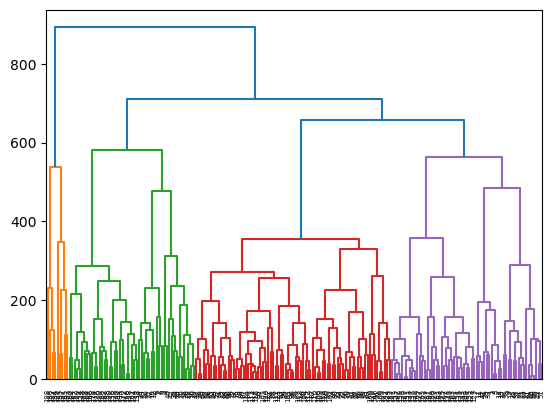

In [39]:
dendro = hierarchy.dendrogram(Z)
plt.savefig('dendrogram.png', bbox_inches = 'tight')


### not very useful for our dataset

# Third Model: DBSCAN

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler 


In [41]:
X1 = X[: , 1:]
# X1

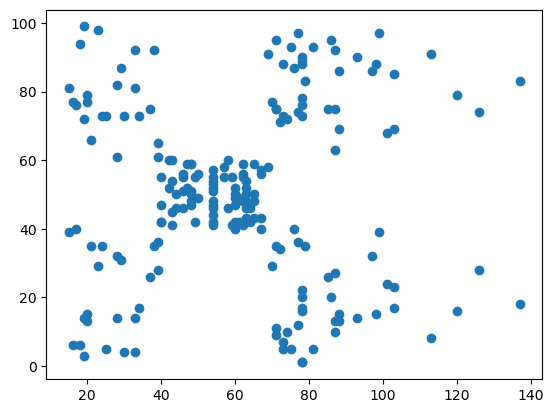

In [42]:
plt.scatter(X1[: , 0] , X1[: , 1])

In [51]:
epsilon = 5
mini = 4
db = DBSCAN(eps=epsilon, min_samples=mini).fit(X1)
labels = db.labels_
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2,  5,  4,  5,  4,  5,
        2,  5,  4,  3,  2,  3,  2, -1,  4,  3,  4, -1, -1, -1, -1, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [52]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# core_samples_mask

In [53]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

7

In [54]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6}

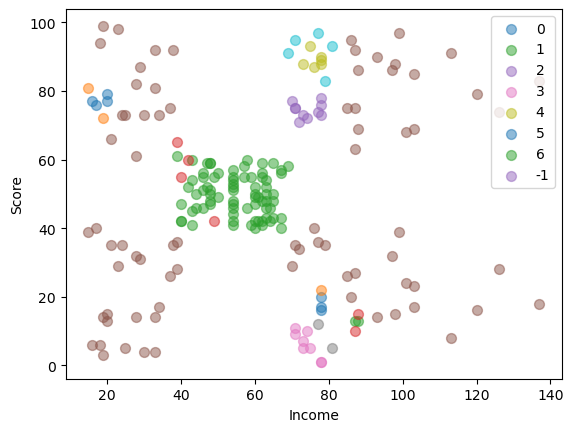

In [55]:
# colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
# Plot the points with colors
for k in unique_labels:
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X1[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50 ,marker=u'o', alpha=0.5 , label = k)

    # Plot the outliers
    xy = X1[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50,  marker=u'o', alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.savefig('income_score_DBSCAN.png', bbox_inches = 'tight')

plt.show()